# Personal Network Data Project
## Overview
Provide a brief overview of the dataset and its contet.
## Data Description

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
network = pd.read_csv("network-data-1.csv")
network2 = pd.read_csv("network-data-2.csv")
print(network.head())
print(network.info())
print(network.describe())
print(network.columns)


               BSSID       First time seen        Last time seen   channel  \
0  A8:63:7D:0C:0B:AC   2024-02-08 16:18:17   2024-02-08 16:18:21      13.0   
1  26:C9:84:16:CC:47   2024-02-08 16:15:42   2024-02-08 16:18:25       6.0   
2  B4:B0:24:23:13:38   2024-02-08 16:10:01   2024-02-08 16:18:13       9.0   
3  98:48:27:98:76:88   2024-02-08 16:17:43   2024-02-08 16:17:58       7.0   
4  C8:D1:2A:4E:C4:38   2024-02-08 16:16:23   2024-02-08 16:18:01      11.0   

    Speed  Privacy      Cipher  Authentication  Power  # beacons  # IV  \
0    -1.0      WPA                                 -1          0     7   
1   180.0     WPA2        CCMP             PSK    -73         38     1   
2   130.0     WPA2   CCMP TKIP             PSK    -66        128    18   
3   130.0     WPA2   CCMP TKIP             PSK    -70         10     0   
4   130.0      WPA   CCMP TKIP             PSK    -70         31    10   

             LAN IP   ID-length             ESSID  
0     0.  0.  0.  0         0.0   

# Converting First Time Seen and Last Time Seen to Datetime

In [2]:
network[" First time seen"]=pd.to_datetime(network[" First time seen"])
network[" Last time seen"]=pd.to_datetime(network[" Last time seen"])
network2[" First time seen"]=pd.to_datetime(network2[" First time seen"])
network2[" Last time seen"]=pd.to_datetime(network2[" Last time seen"])

# Removing Duplicates & Sorting & Checking For Missing Values

BSSID               False
 First time seen    False
 Last time seen     False
 channel            False
 Speed              False
 Privacy             True
 Cipher              True
 Authentication      True
 Power              False
 # beacons          False
 # IV               False
 LAN IP             False
 ID-length          False
 ESSID               True
dtype: bool


Text(0, 0.5, 'Missing Values')

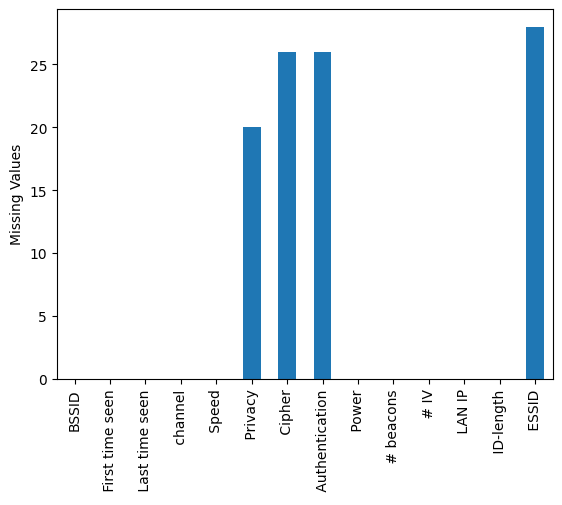

In [3]:
network = network.sort_values(" First time seen")
network2 = network2.sort_values(" First time seen")
network.drop_duplicates(subset="BSSID")
network2.drop_duplicates(subset="BSSID")
network.drop(columns = " LAN IP")
network2.drop(columns = " LAN IP")
network = network.replace(r'^\s*$', np.nan, regex=True)
network2 = network2.replace(r'^\s*$', np.nan, regex=True)
network = network[network["BSSID"].notnull()]
network2 = network2[network2["BSSID"].notnull()]
print(network.isna().any())
network.isna().sum().plot(kind="bar")
plt.ylabel("Missing Values")






# Handling Missing Values

Text(0, 0.5, 'Missing Values')

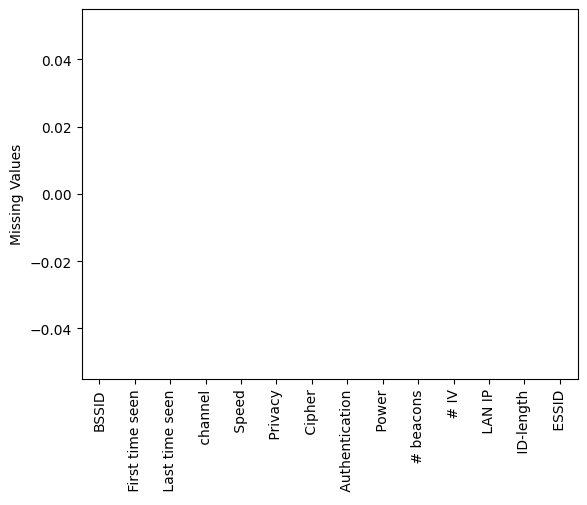

In [4]:
network[" ESSID"]=network[" ESSID"].fillna("No_Name")
network2[" ESSID"]=network2[" ESSID"].fillna("No_Name")
network_data_to_predict = network[network[" Privacy"].isnull() | network[" Cipher"].isnull() | network[" Authentication"].isnull()]
network_data_to_predict2 = network2[network2[" Privacy"].isnull() | network2[" Cipher"].isnull() | network2[" Authentication"].isnull()]
network = network[network[" Privacy"].notnull() & network[" Cipher"].notnull() & network[" Authentication"].notnull()]
network2 = network2[network2[" Privacy"].notnull() & network2[" Cipher"].notnull() & network2[" Authentication"].notnull()]
network.isna().sum().plot(kind="bar")
plt.ylabel("Missing Values")

# Initial Insights

               Power                      Speed                       \
                mean median max min        mean median    max    min   
 Privacy                                                               
WPA       -70.733333  -71.0 -57 -79  122.400000  130.0  130.0   54.0   
WPA2      -70.187320  -71.0 -48 -79  135.195965  130.0  270.0   54.0   
WPA2 OPN  -75.000000  -75.0 -75 -75  130.000000  130.0  130.0  130.0   
WPA2 WPA  -65.000000  -65.0 -55 -75   92.000000   92.0  130.0   54.0   
WPA3 WPA2 -74.000000  -73.0 -72 -77  360.000000  360.0  360.0  360.0   

            channel                    # beacons                        # IV  \
               mean median   max  min       mean median  max min        mean   
 Privacy                                                                       
WPA        7.000000    6.0  13.0  1.0  16.333333   15.5   51   1   10.733333   
WPA2       6.244957    6.0  14.0  1.0  31.677233   16.0  774   0   36.536023   
WPA2 OPN   2.000000    

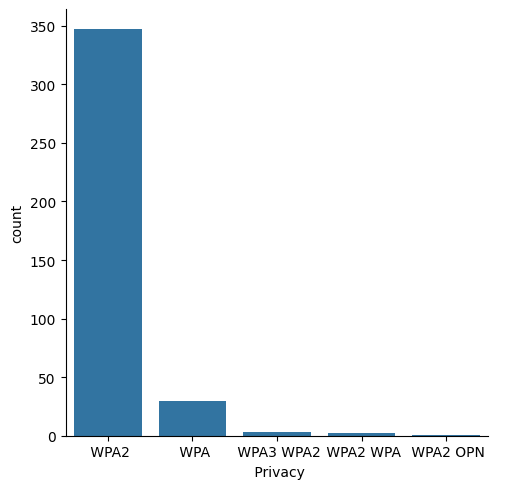

In [5]:
network[[" Power"," Speed"," channel"," # beacons"," # IV"]] = network[[" Power"," Speed"," channel"," # beacons"," # IV"]].apply(pd.to_numeric)
sns.catplot(x=" Privacy",data=network,kind="count")
print(network.groupby(" Privacy")[[" Power"," Speed"," channel"," # beacons"," # IV"]].agg(["mean","median","max","min"]))



# Uploading Clients Data

Index(['Station MAC', ' First time seen', ' Last time seen', ' Power',
       ' # packets', ' BSSID', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')


<Axes: >

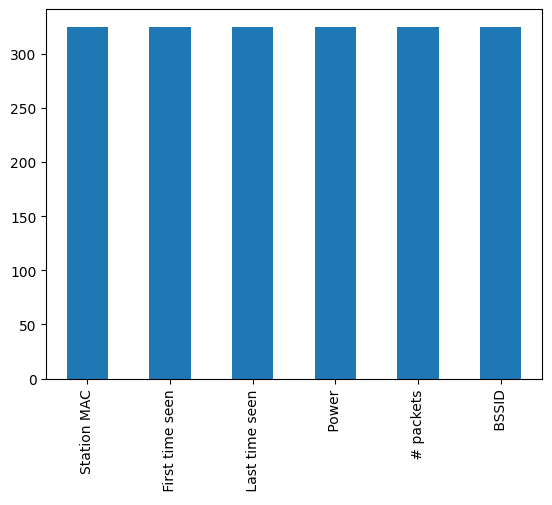

In [6]:
clients=pd.read_csv("clients-data-1.csv")
clients1=pd.read_csv("clients-data-2.csv")
print(clients.columns)
clients = clients[['Station MAC', ' First time seen', ' Last time seen', ' Power',' # packets', ' BSSID']]
clients1 = clients1[['Station MAC', ' First time seen', ' Last time seen', ' Power',' # packets', ' BSSID']]
clients.isna().sum().plot(kind="bar")

# Cleaning Clients Data

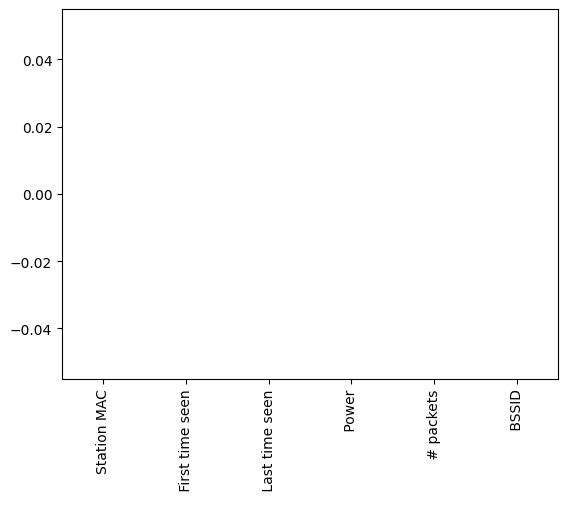

In [7]:
clients.drop_duplicates(subset="Station MAC")
clients1.drop_duplicates(subset="Station MAC")
clients = clients[clients["Station MAC"].notnull()]
clients1 = clients1[clients1["Station MAC"].notnull()]
clients.isna().sum().plot(kind="bar")
clients[" First time seen"]=pd.to_datetime(clients[" First time seen"])
clients[" Last time seen"]=pd.to_datetime(clients[" Last time seen"])
clients1[" First time seen"]=pd.to_datetime(clients1[" First time seen"])
clients1[" Last time seen"]=pd.to_datetime(clients1[" Last time seen"])

In [8]:
clients[[' Power',' # packets']] = clients[[' Power',' # packets']].apply(pd.to_numeric)
clients1[[' Power',' # packets']] = clients1[[' Power',' # packets']].apply(pd.to_numeric)
print(clients[" BSSID"].value_counts())


 BSSID
(not associated)     227
60:A4:B7:C7:6D:68     13
A0:18:42:62:D5:BE      9
34:60:F9:43:9D:A0      6
D8:47:32:34:F9:88      6
                    ... 
B0:0A:D5:47:44:B8      1
78:98:E8:8A:D7:16      1
88:AC:C0:D1:F0:00      1
D8:D8:66:5B:22:6B      1
00:21:27:F6:6D:74      1
Name: count, Length: 212, dtype: int64


# Merging and Concatenating DataFrames


 BSSID
 (not associated)     268
 60:A4:B7:C7:6D:68     13
 D8:47:32:34:F9:88     10
 A0:18:42:62:D5:BE      9
 34:E8:94:BA:84:18      8
                     ... 
24:00:BA:94:3A:C4       1
22:FC:44:DB:34:B6       1
22:CF:53:40:FD:E2       1
22:B5:3E:9D:1F:BC       1
FC:3F:7C:3D:55:BC       1
Name: count, Length: 656, dtype: int64


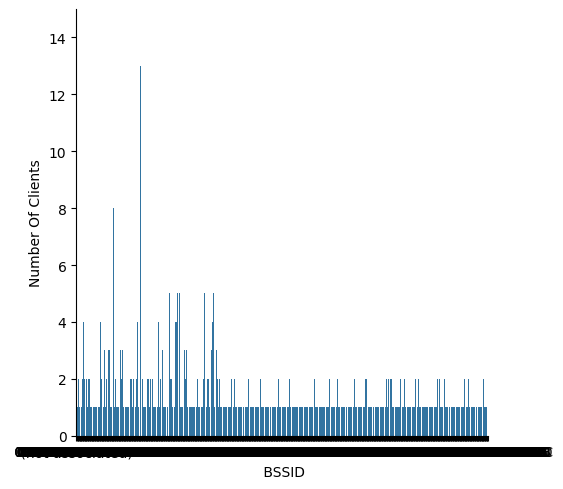

In [9]:
network.reset_index(drop=True, inplace=True)
network2.reset_index(drop=True, inplace=True)
clients.reset_index(drop=True, inplace=True)
clients1.reset_index(drop=True, inplace=True)
network=pd.concat([network,network2])
network.reset_index(drop=True, inplace=True)
clients=pd.concat([clients,clients1])
clients.reset_index(drop=True, inplace=True)
clients.drop_duplicates(subset="Station MAC")
network.drop_duplicates(subset="BSSID")
network.rename(columns={'BSSID': ' BSSID'}, inplace=True)
networks_data=clients.merge(network,on=" BSSID",how="outer")
print(networks_data[" BSSID"].value_counts())
sns.catplot(x=" BSSID",data=networks_data,kind="count")
plt.ylim(0, 15)
plt.ylabel("Number Of Clients")
plt.show()


# Exploratory Data Analysis

Index(['Station MAC', ' First time seen_x', ' Last time seen_x', ' Power_x',
       ' # packets', ' BSSID', ' First time seen_y', ' Last time seen_y',
       ' channel', ' Speed', ' Privacy', ' Cipher', ' Authentication',
       ' Power_y', ' # beacons', ' # IV', ' LAN IP', ' ID-length', ' ESSID'],
      dtype='object')


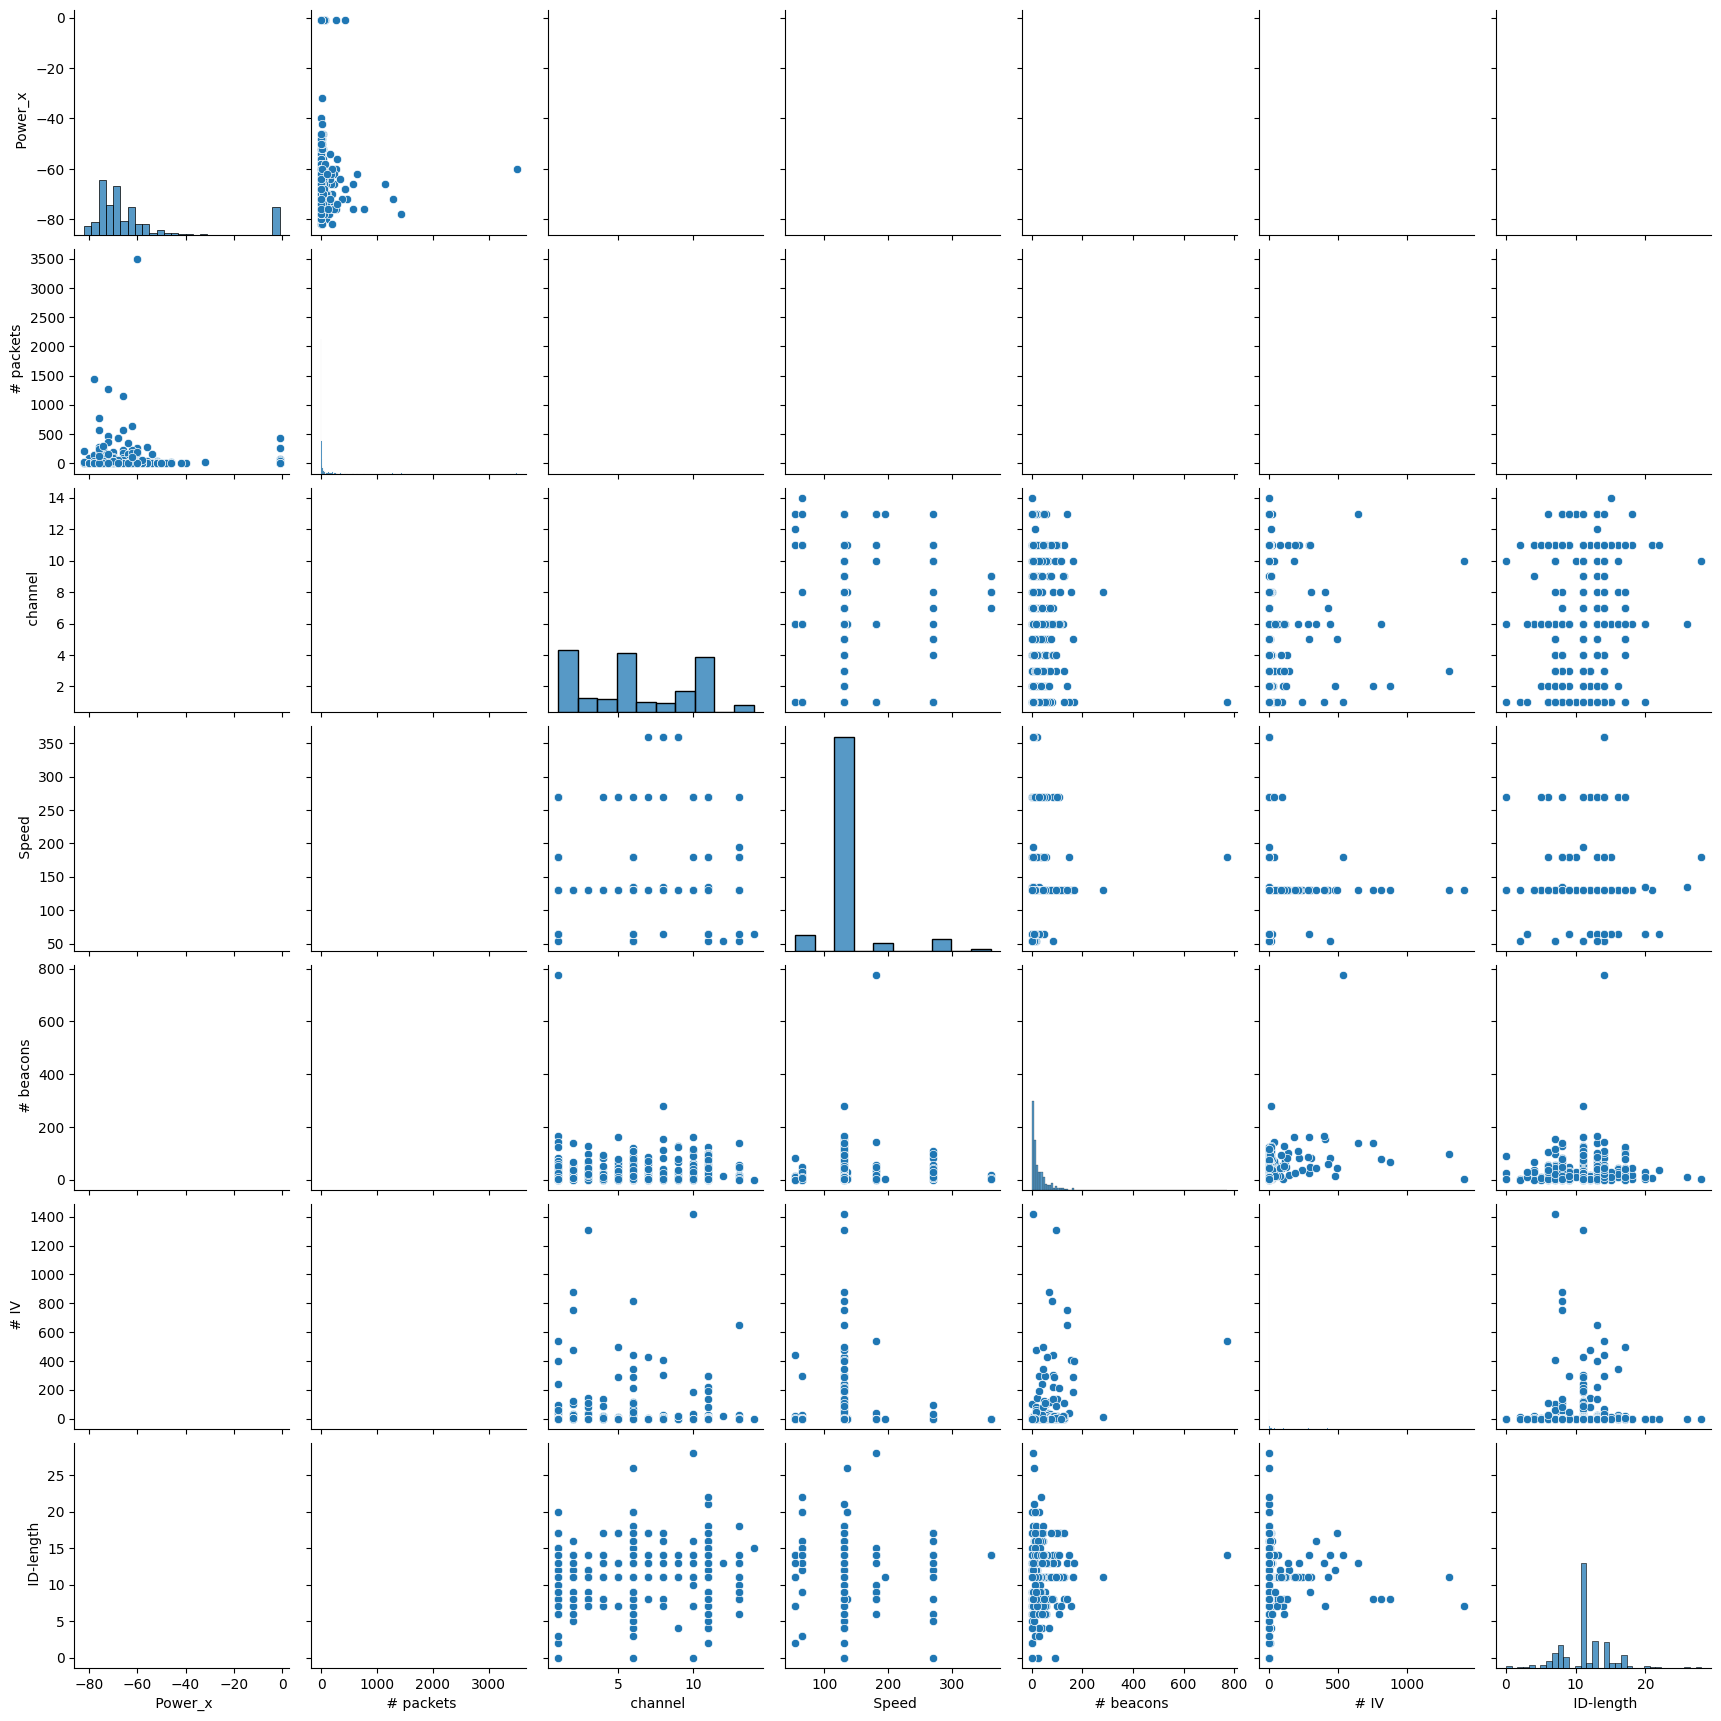

In [10]:
networks_data = networks_data[networks_data[" BSSID"] != " (not associated) "]
print(networks_data.columns)
corr_matrix = networks_data[[' # packets',' Power_x',' channel',' Speed',' # beacons',' # IV', ' ID-length',' Power_y']].corr()
sns.pairplot(networks_data)
plt.show()


# Hypothesis Testing
Hypothesis 1: There is a significant difference in the number of packets transmitted/received between different BSSIDs.

Hypothesis 2: Access points with higher signal power levels have higher speeds.

Hypothesis 3: There is a relationship between the number of beacons (# beacons) transmitted by access points and the signal strength (Power_y).



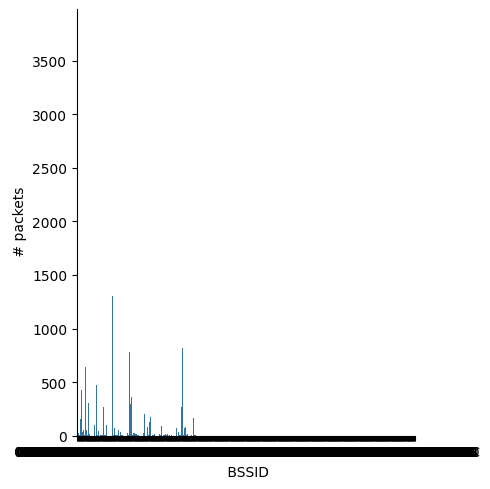

In [15]:
Result1 = networks_data.groupby(" BSSID")[" # packets"].agg("sum")
sns.catplot(data=Result1,kind="bar")
plt.show()
# we see that There is a significant difference in the number of packets transmitted/received between different BSSIDs.  ==> Hypothesis Approved 


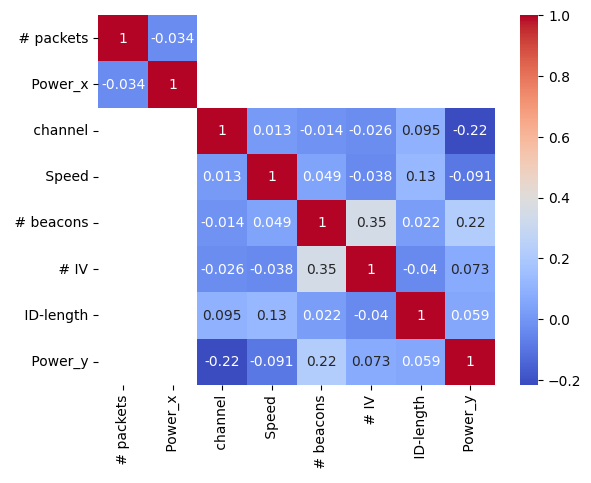

In [12]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
# we see a negative corrolation between Power_y and Speed Quality of Connection , 
# a negative correlation between speed and signal power may indicate issues with the quality of the wireless connection. 
# For instance, if the signal power is weak due to interference or distance, 
# it could lead to lower data transfer speeds as the device struggles to maintain a stable connection.



In [ ]:
# there is a positive corrolation about 0.22 , 
# the positive correlation between signal power and the number of beacons suggests that access points with stronger signal power may transmit more beacons to maintain network visibility 
# ==> Hypothesis Approved 

# Exporting The Data

In [13]:
networks_data.to_csv("networks_data.csv")
network.to_csv("network.csv")
clients.to_csv("clients.csv")